<a href="https://colab.research.google.com/github/DanielaRandazo/coderhouse/blob/main/visualizaciondanielarandazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/CoderHouse')

Mounted at /CoderHouse


In [4]:
DF_IMDB = pd.read_csv('/CoderHouse/MyDrive/CoderHouse/IMDB.csv')

In [5]:
print(DF_IMDB.columns)

Index(['Unnamed: 0', 'index', 'tconst', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'ordering', 'title', 'region',
       'language', 'types', 'attributes', 'isOriginalTitle', 'Description'],
      dtype='object')


In [6]:
DF_IMDB.head()

,Unnamed: 0,index,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle,Description
0,0,0,tt0102926,movie,The Silence of the Lambs,The Silence of the Lambs,0,1991,\N,118,...,8.6,1473918,50,The Silence of the Lambs,US,en,\N,\N,0,"Jodie Foster stars as Clarice Starling, a top ..."
1,1,1,tt0103064,movie,Terminator 2: Judgment Day,Terminator 2: Judgment Day,0,1991,\N,137,...,8.6,1128166,17,Terminator 2: Judgment Day,US,en,dvd,\N,0,"In this sequel set eleven years after ""The Ter..."
2,2,3,tt0110357,movie,The Lion King,The Lion King,0,1994,\N,88,...,8.5,1090882,18,The Lion King 3D,US,en,\N,3-D version,0,This Disney animated feature follows the adven...
3,3,4,tt0110912,movie,Pulp Fiction,Pulp Fiction,0,1994,\N,154,...,8.9,2118762,22,Pulp Fiction,US,en,\N,\N,0,Vincent Vega (John Travolta) and Jules Winnfie...
4,4,5,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,\N,142,...,9.3,2759621,2,The Shawshank Redemption,US,en,\N,\N,0,Andy Dufresne (Tim Robbins) is sentenced to tw...


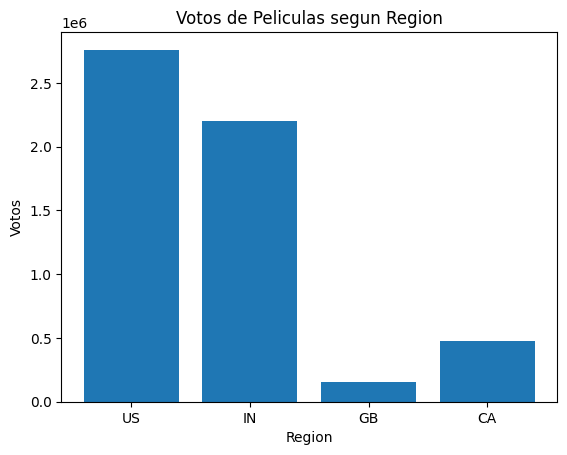

In [7]:
#Matplotlib #1

# Datos
region = DF_IMDB['region']
votos = DF_IMDB['numVotes']

# Creo el objeto
fig, ax = plt.subplots()

# Crea el gráfico de barras
ax.bar(region, votos)

# Puedes agregar etiquetas y título
ax.set_xlabel('Region')
ax.set_ylabel('Votos')
ax.set_title('Votos de Peliculas segun Region')

# Muestra el gráfico
plt.show()




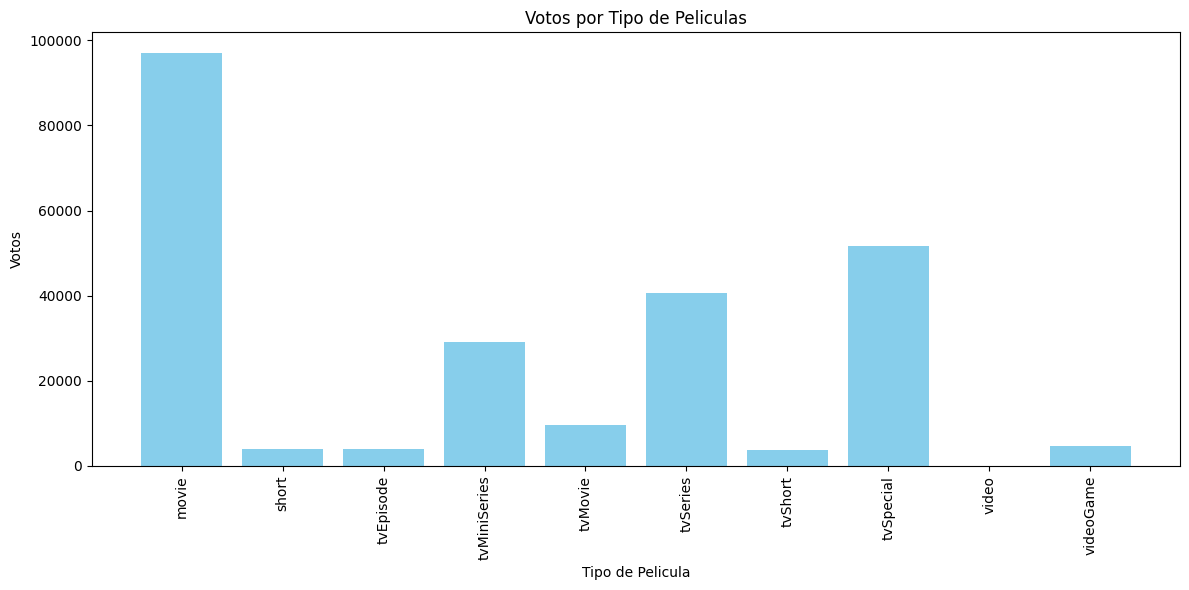

In [10]:
#Matplotlib #2

Types = DF_IMDB.groupby('titleType')['numVotes'].mean().reset_index()

# Creo el gráfico de barras por tipo de pelis
plt.figure(figsize=(12, 6))
plt.bar(Types['titleType'], Types['numVotes'], color='skyblue')
plt.xlabel('Tipo de Pelicula')
plt.ylabel('Votos')
plt.title('Votos por Tipo de Peliculas')
plt.xticks(rotation=90)  # Roto las etiquetas del eje x para que sean legibles

# Muestro mi gráfico
plt.tight_layout()
plt.show()






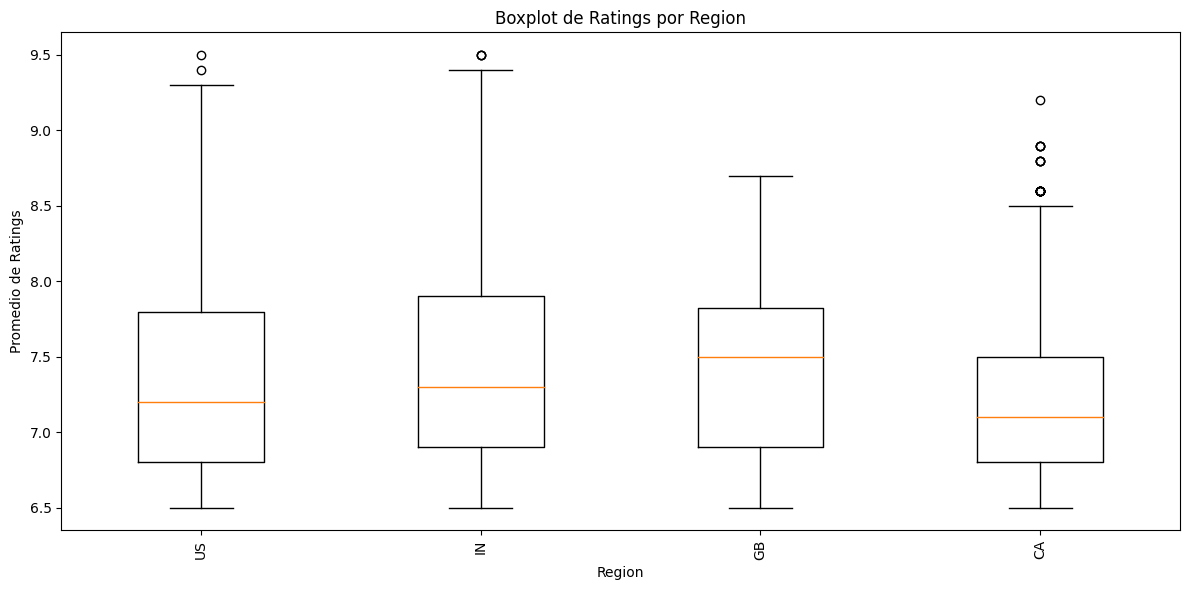

In [11]:
#Matplotlib #3


# Creo un gráfico de boxplot
plt.figure(figsize=(12, 6))
plt.boxplot([DF_IMDB[DF_IMDB['region'] == year]['averageRating'] for year in DF_IMDB['region'].unique()], labels=DF_IMDB['region'].unique())
plt.xlabel('Region')
plt.ylabel('Promedio de Ratings')
plt.title('Boxplot de Ratings por Region')
plt.xticks(rotation=90)

# Muestro el gráfico
plt.tight_layout()
plt.show()



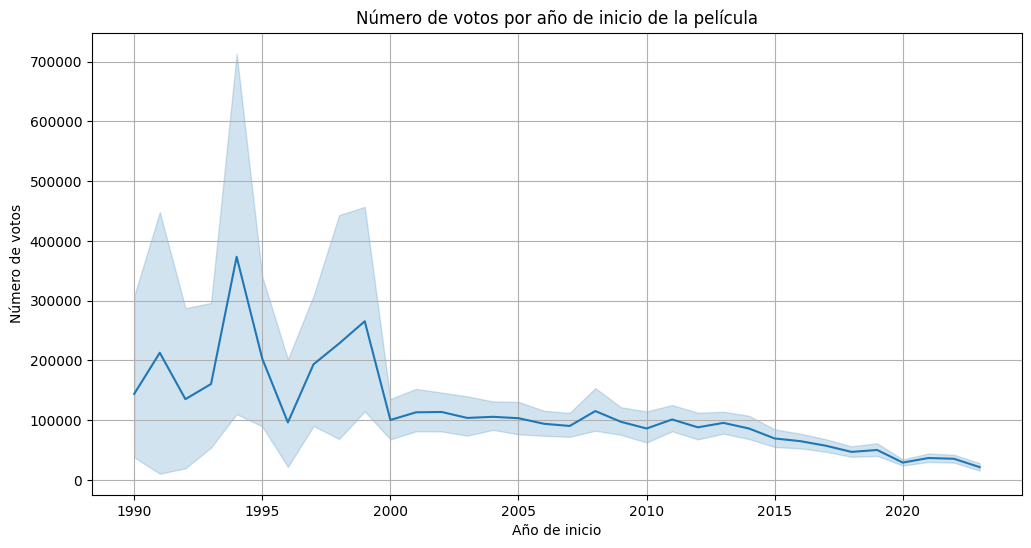

In [12]:
#Seaborn #1

plt.figure(figsize=(12, 6))  # Tamanio del grafico

# Ordeno el DataFrame por 'startYear' para tener los datos en orden
DF_IMDB_sorted = DF_IMDB.sort_values(by='startYear')

# Plotea los datos en el gráfico de líneas
sns.lineplot(data=DF_IMDB_sorted, x='startYear', y='numVotes')

# Etiquetas de los ejes y el título
plt.xlabel('Año de inicio')
plt.ylabel('Número de votos')
plt.title('Número de votos por año de inicio de la película')

# Muestra el gráfico
plt.grid(True)  # Activa la cuadrícula
plt.show()



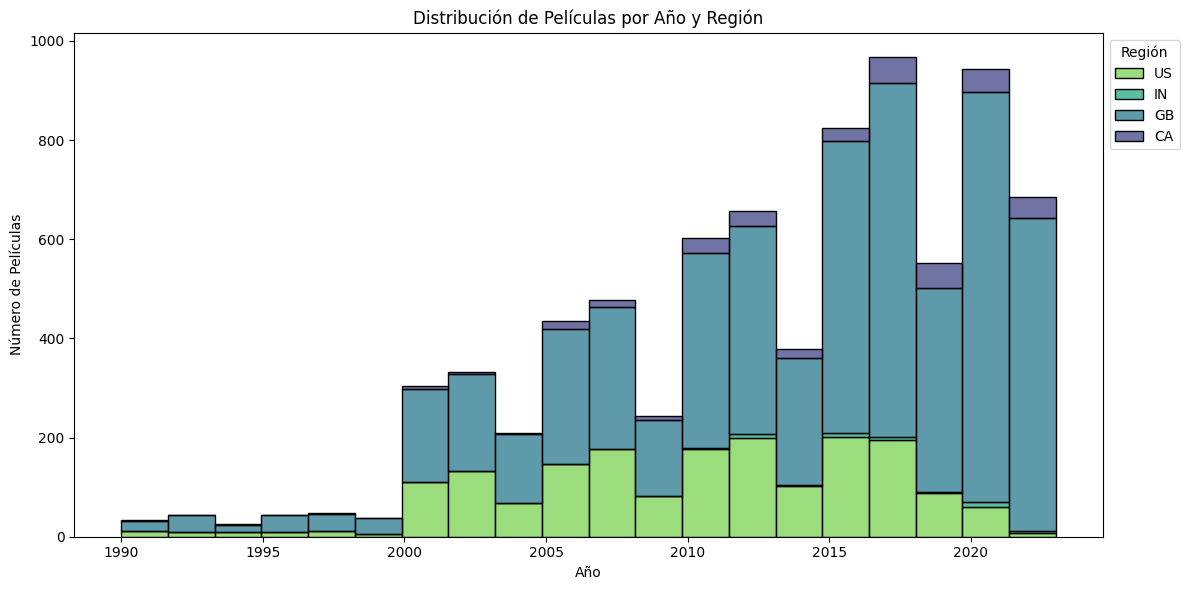

In [14]:
#Seaborn #2

# Creo un histograma de películas por año y región
plt.figure(figsize=(12, 6))
sns.histplot(data=DF_IMDB, x='startYear', hue='region', multiple='stack', palette='viridis', bins=20)
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.title('Distribución de Películas por Año y Región')
#plt.legend(title='Región', loc='upper left', bbox_to_anchor=(1, 1))


#Agrego las leyendas de las barras a la derecha
legend_labels = DF_IMDB['region'].unique()
plt.legend(title='Región', labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1))


# Muestro el gráfico
plt.tight_layout()
plt.show()


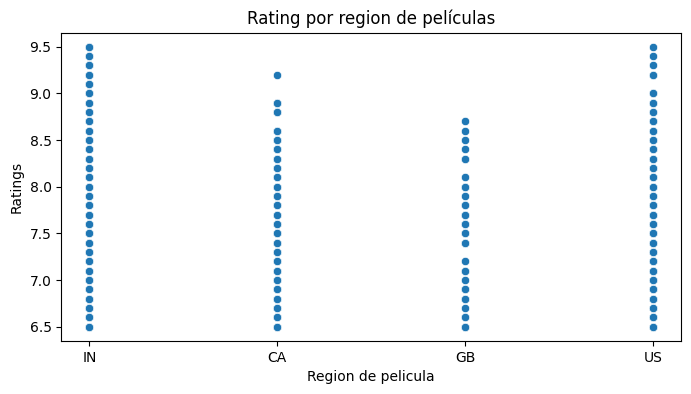

In [15]:
#Seaborn #3

plt.figure(figsize=(8, 4))  # Tamanio del grafico

# Ordeno el DataFrame por 'startYear' para tener los datos en orden
DF_IMDB_sorted = DF_IMDB.sort_values(by='averageRating')

# Plotea los datos en el gráfico de líneas
sns.scatterplot(data=DF_IMDB_sorted, x='region', y='averageRating')
#sns.scatterplot(data=DF_IMDB_sorted, x='averageRating', y='genres')

# Etiquetas de los ejes y el título
plt.xlabel('Region de pelicula')
plt.ylabel('Ratings')
plt.title('Rating por region de películas')

# Muestro el gráfico
plt.grid(False)  # Activa la cuadrícula
#plt.gca().set_facecolor('#FFC0CB')  # Color de fondo
plt.show()

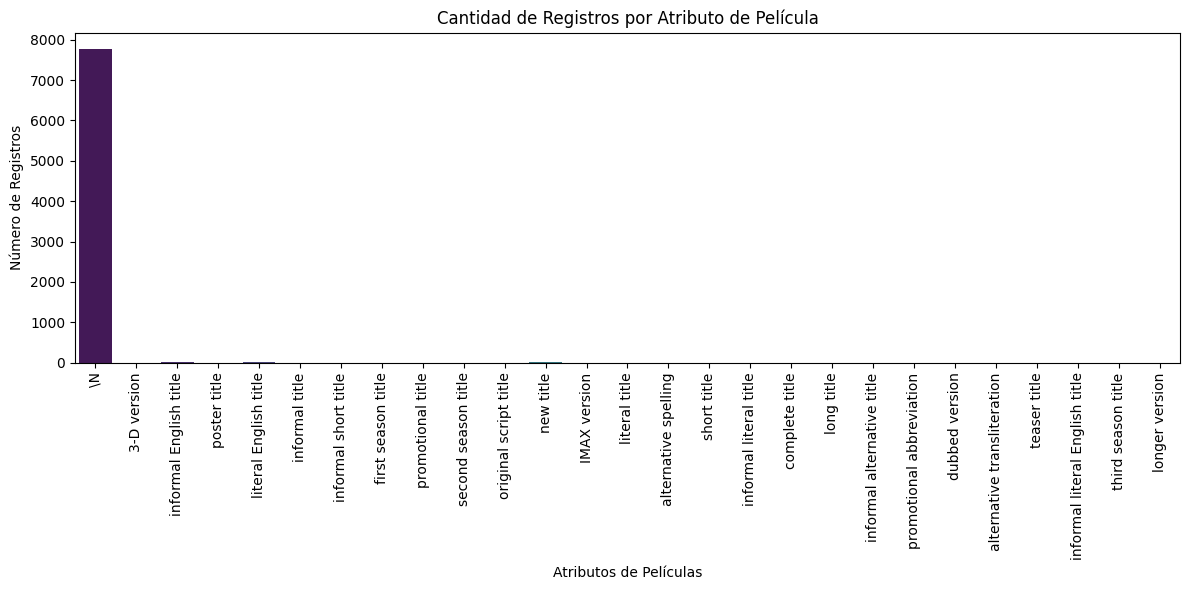

In [16]:
#Seaborn #4

# Busque para crear un Grafico de Cantidad de Registros por Atributos de peliculas (countplot)

plt.figure(figsize=(12, 6))
sns.countplot(data=DF_IMDB, x='attributes', palette='viridis')
plt.xlabel('Atributos de Películas')
plt.ylabel('Número de Registros')
plt.title('Cantidad de Registros por Atributo de Película')
plt.xticks(rotation=90)  # Roto las etiquetas del eje x para que sean legibles

# Muestro el gráfico
plt.tight_layout()
plt.show()
